In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

###### DATA CLEANING

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
#### Data Preprocessing

In [12]:
df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)


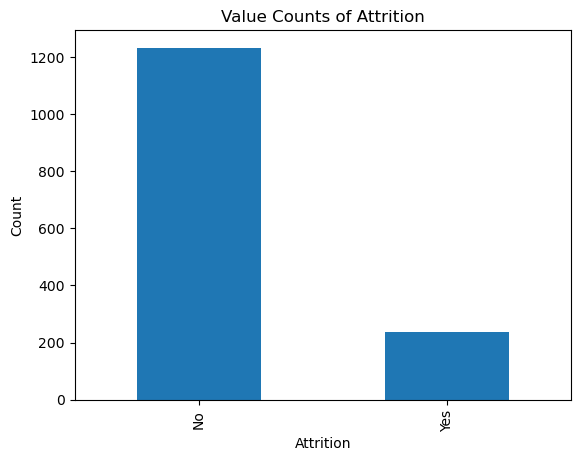

In [13]:
value_counts = df['Attrition'].value_counts()
value_counts.plot(kind='bar')
plt.title('Value Counts of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#### Outliers

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_cols)
object_cols = df.select_dtypes(include=['object']).columns
print("Object Columns:", object_cols)

Numeric Columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Object Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


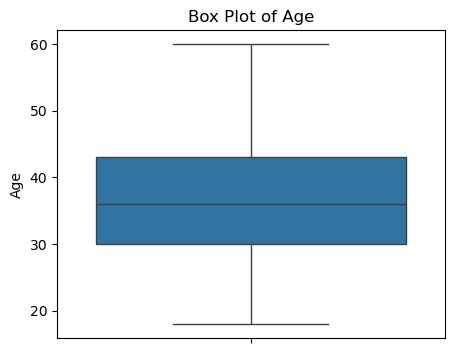

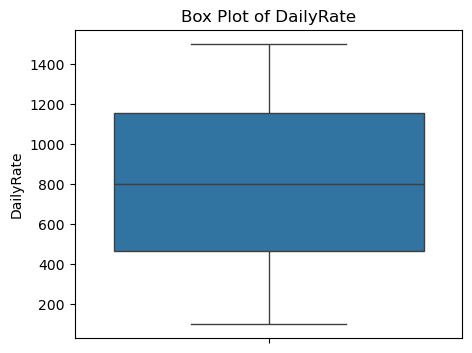

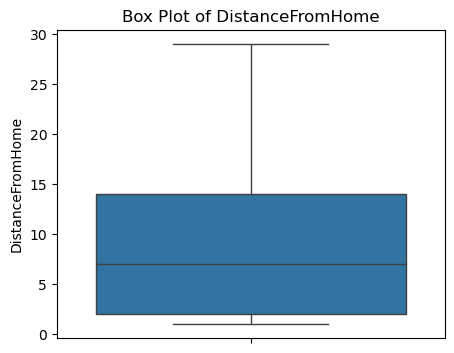

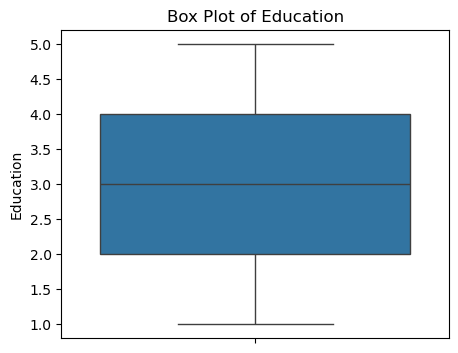

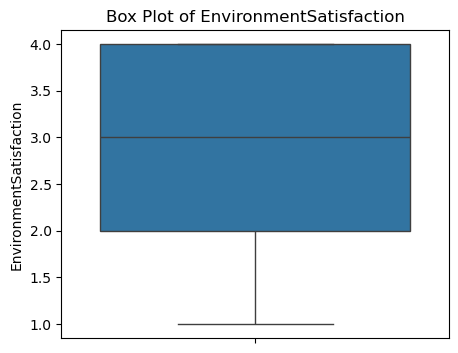

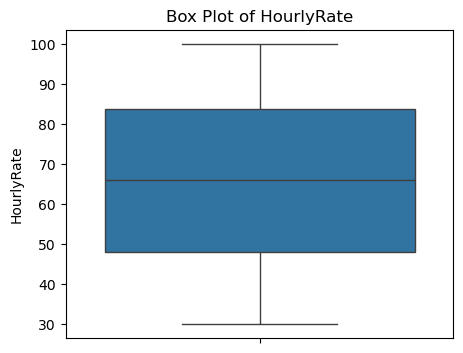

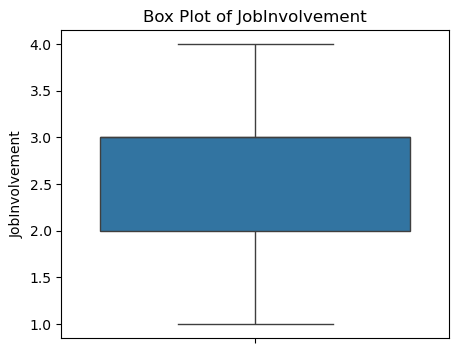

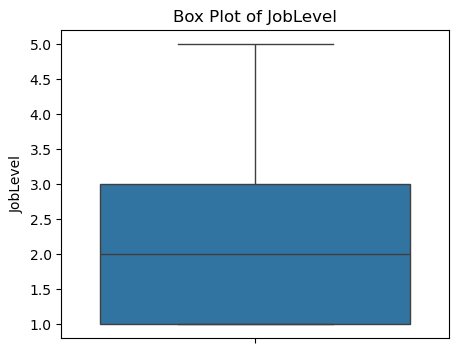

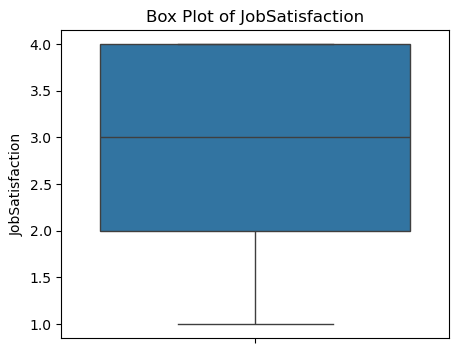

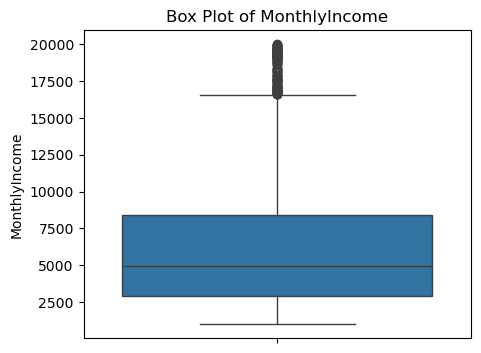

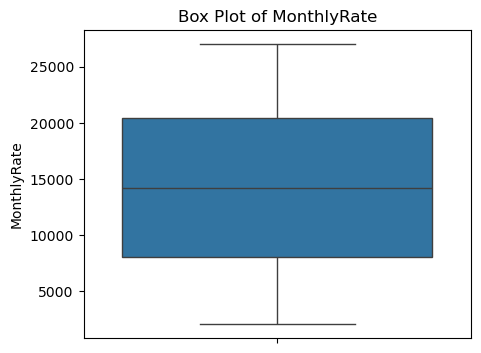

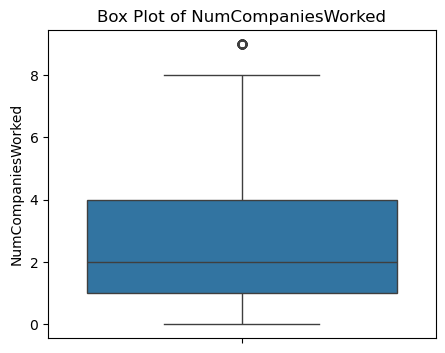

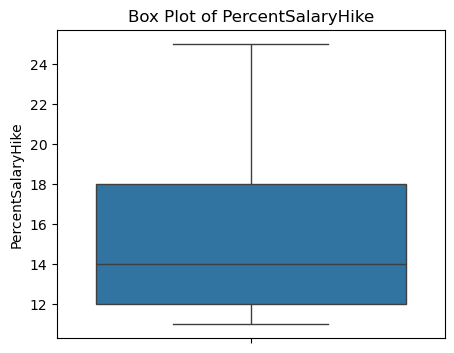

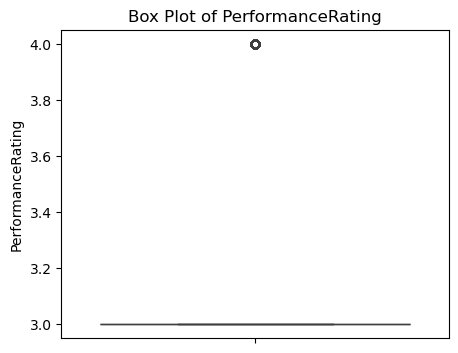

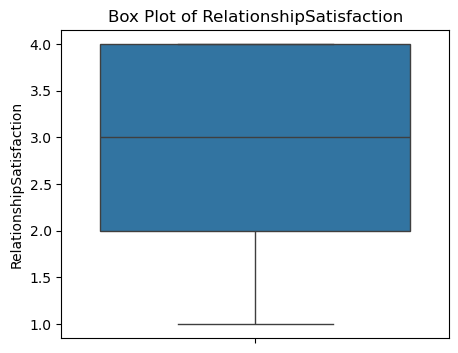

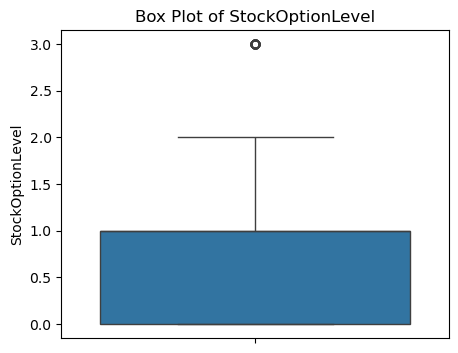

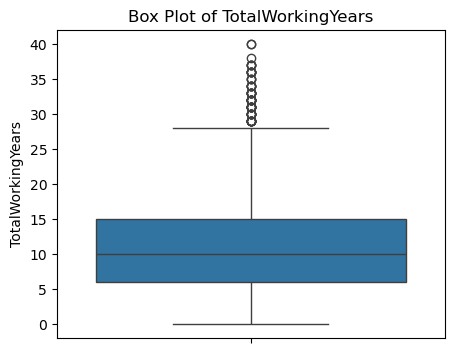

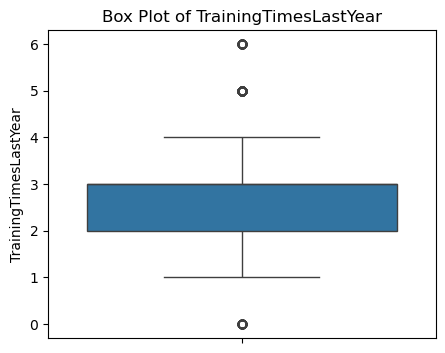

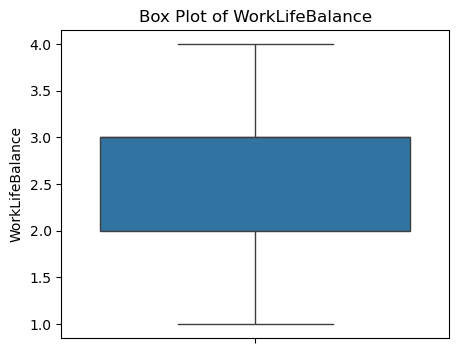

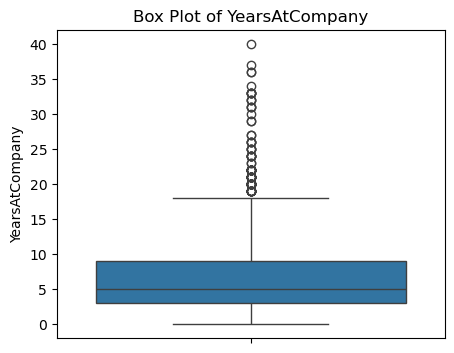

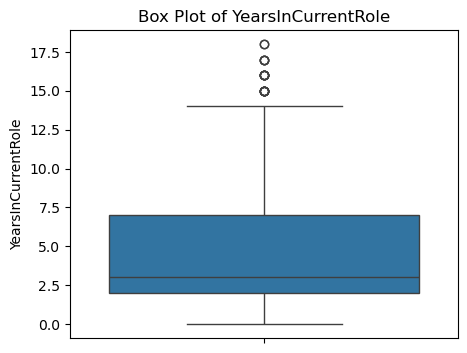

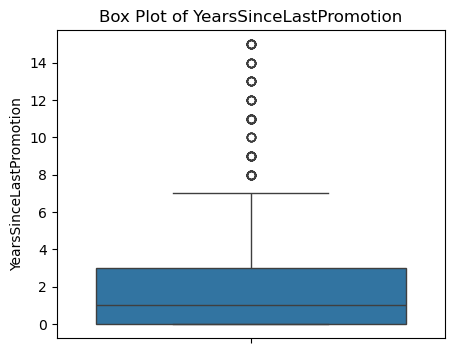

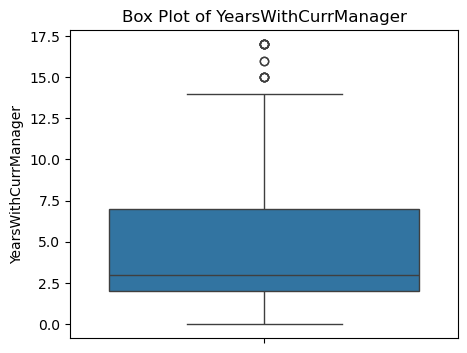

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

##### Data distribution

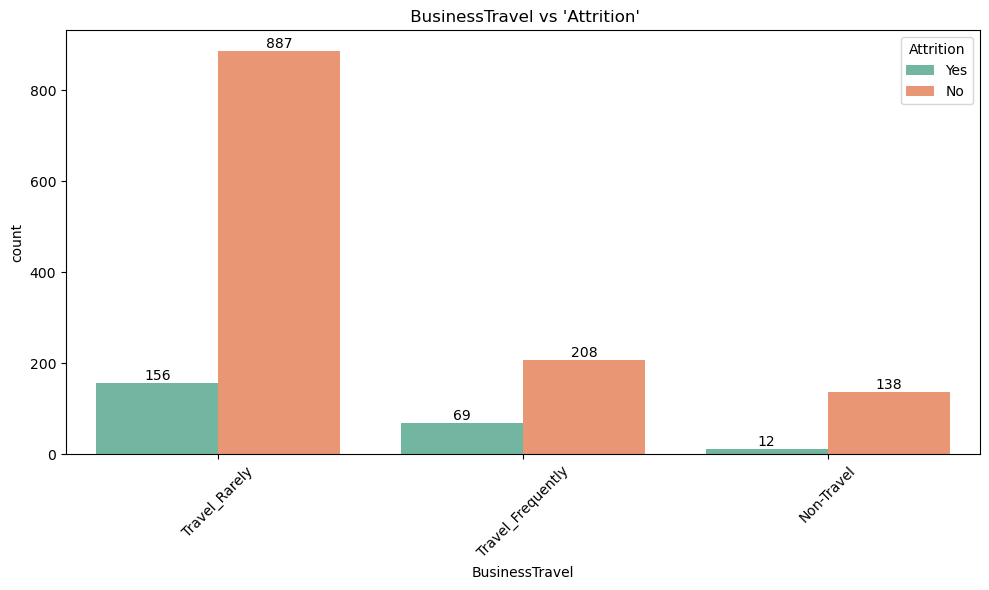

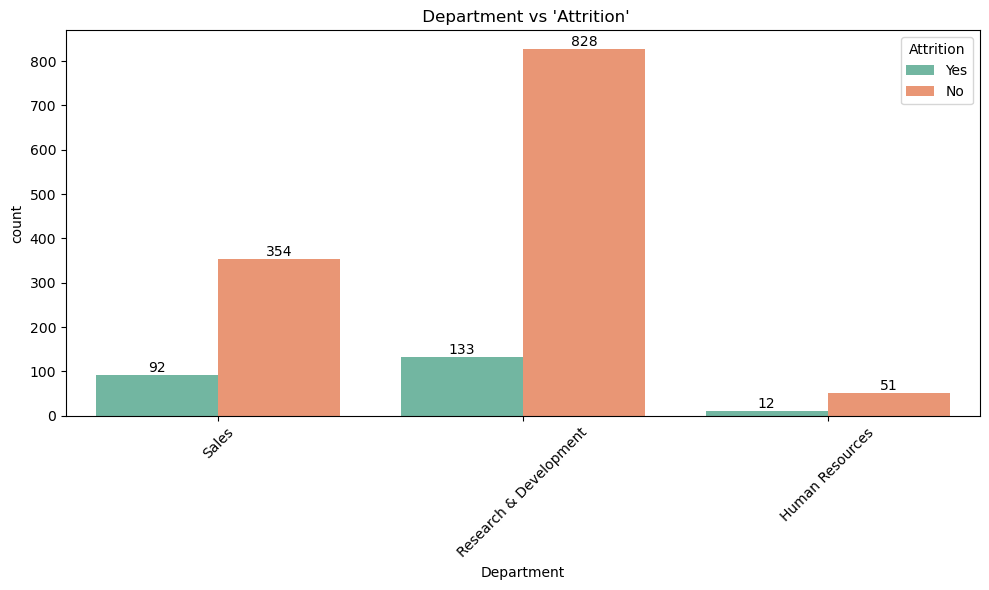

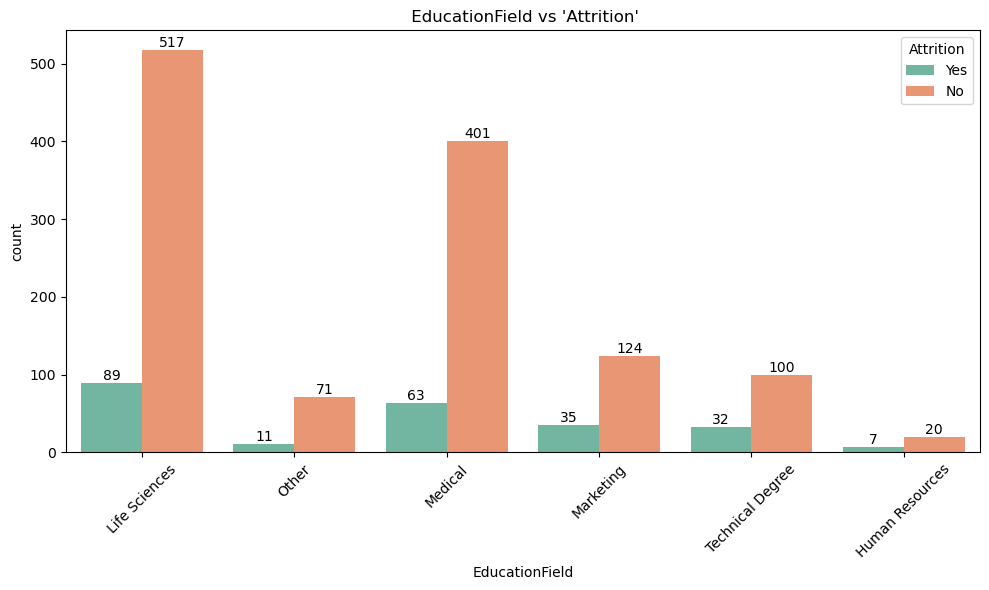

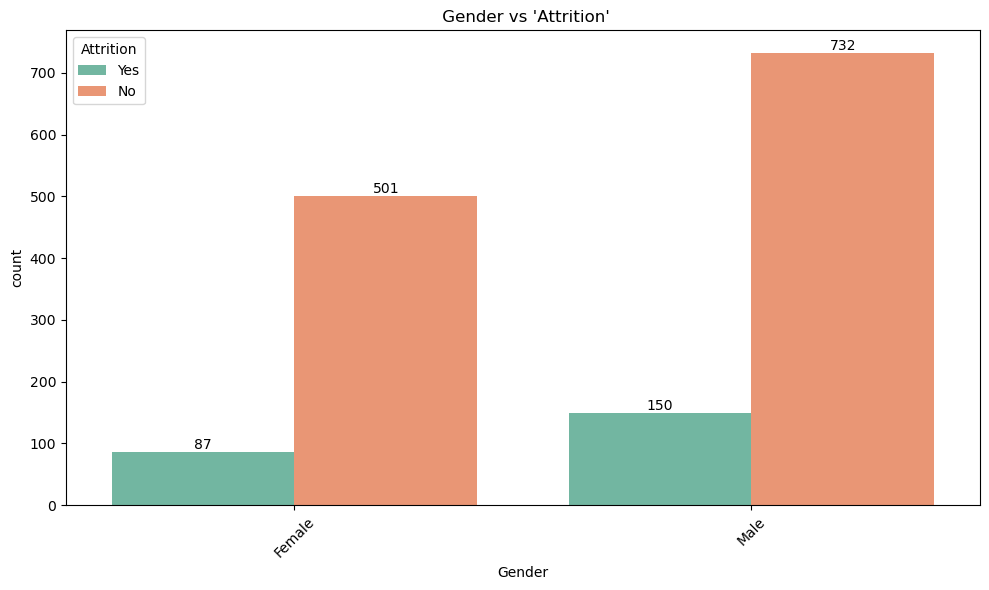

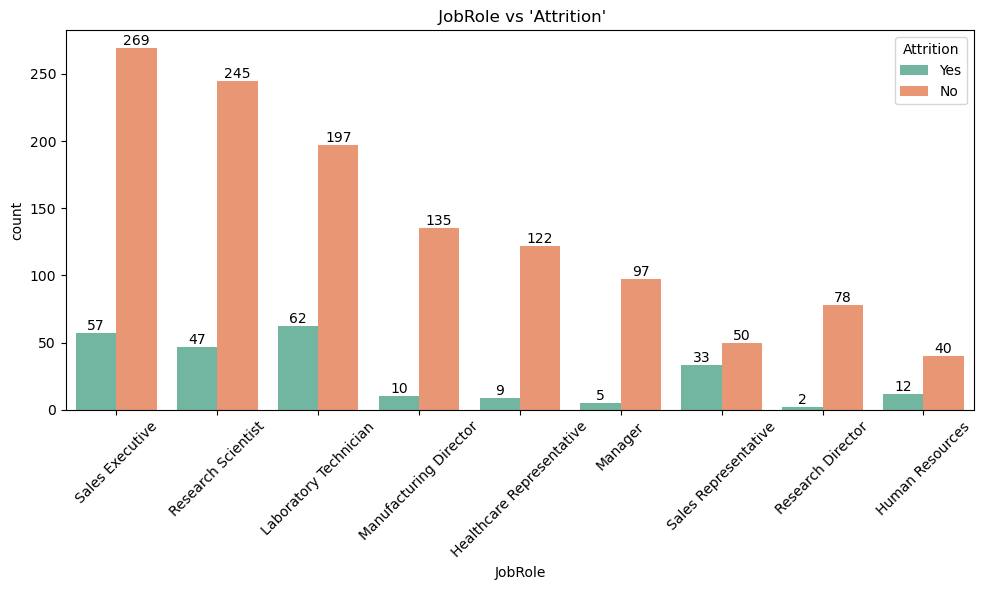

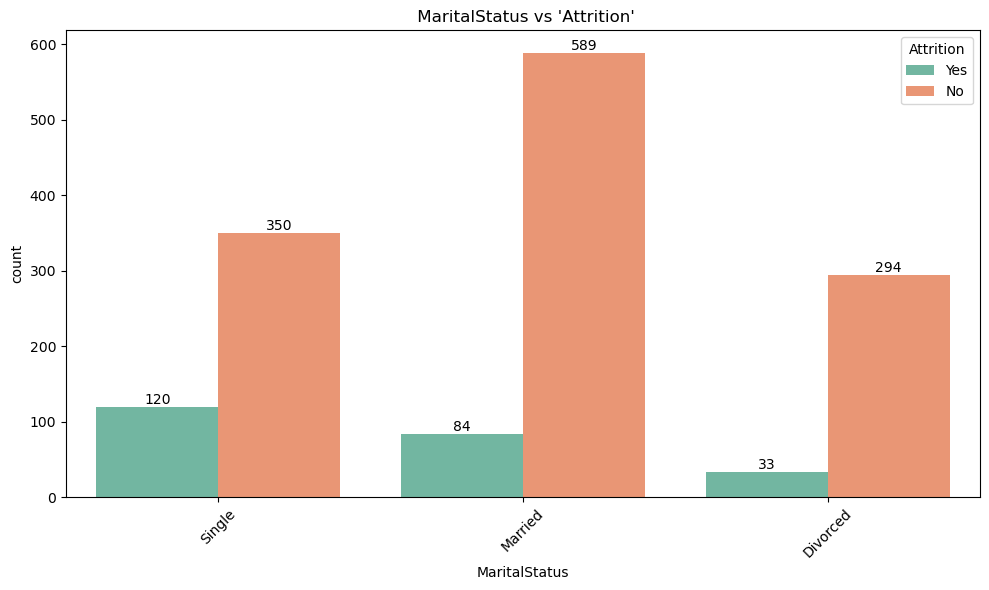

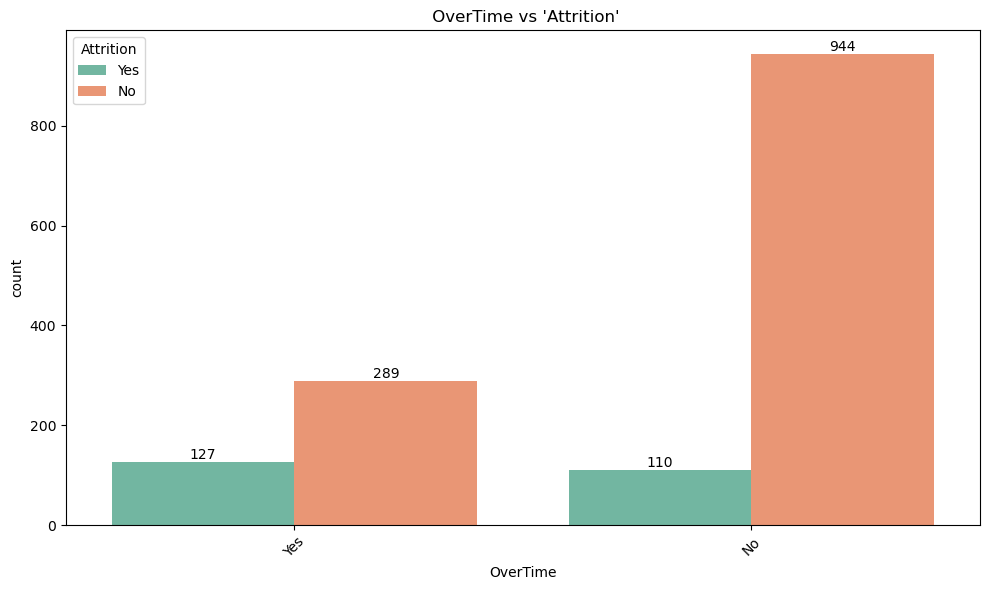

In [18]:
for i in object_cols :
    if i == 'Attrition':
        continue
    
    plt.figure(figsize=(10,6))
    ax=sns.countplot(data=df ,x=i ,hue='Attrition' ,palette='Set2')
    plt.title(f" {i} vs 'Attrition'")
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

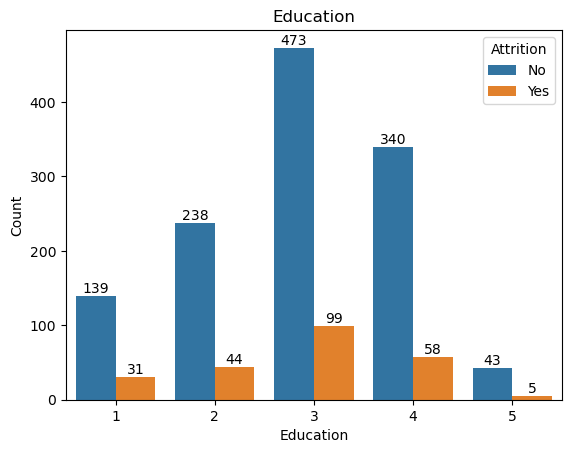

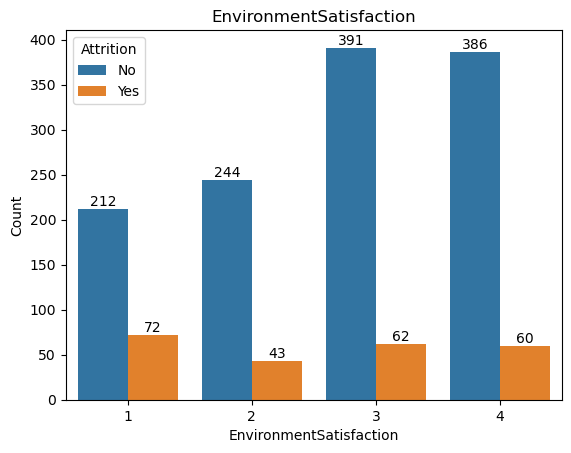

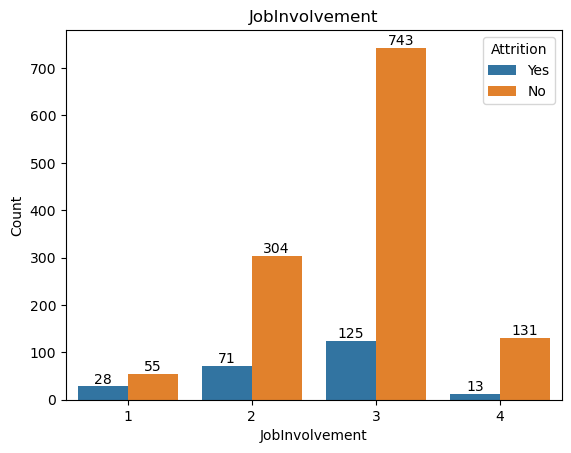

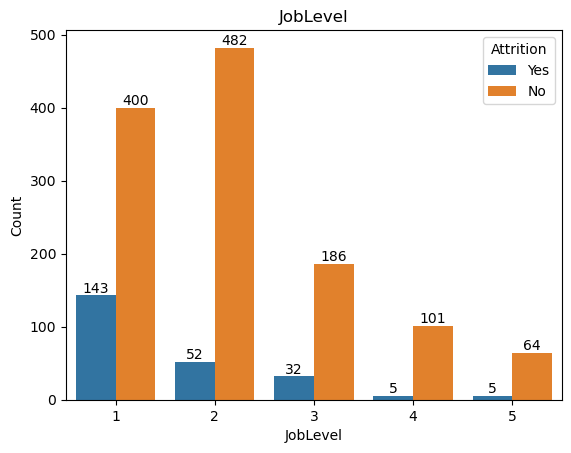

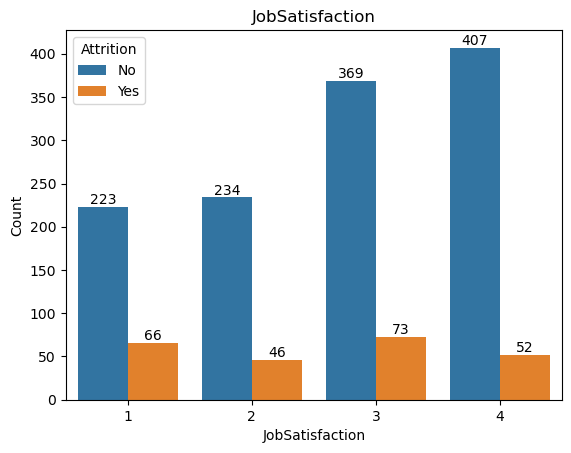

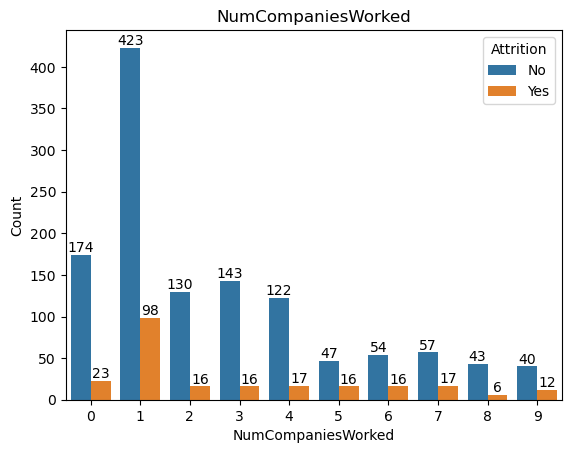

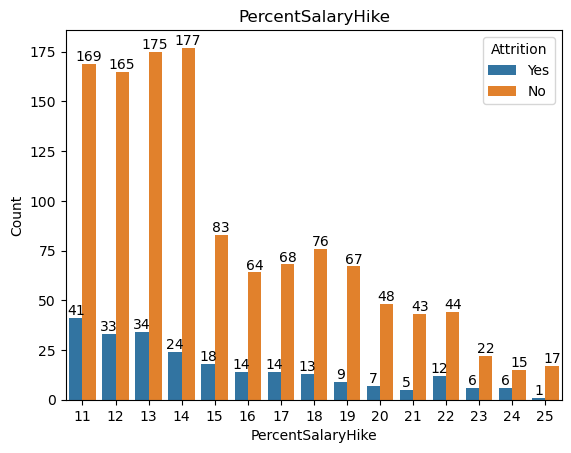

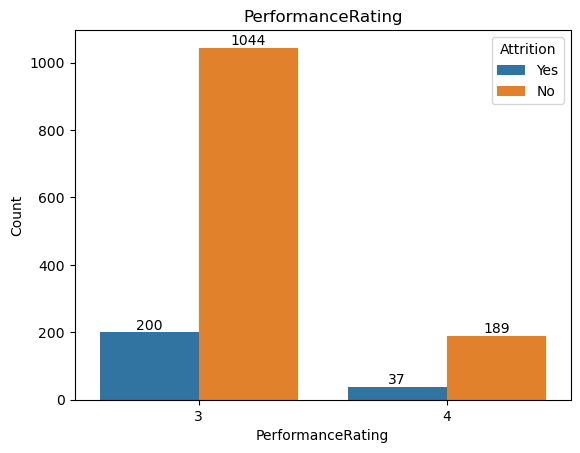

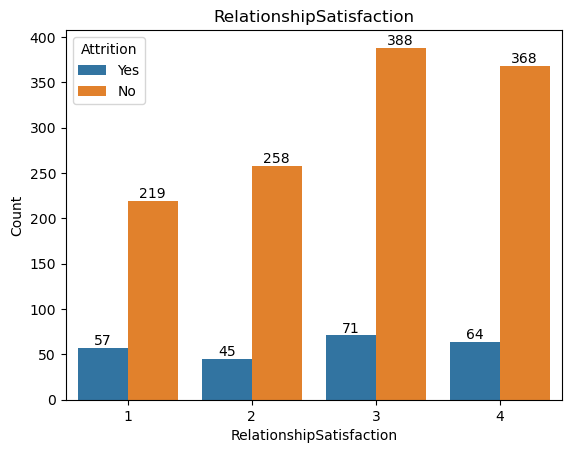

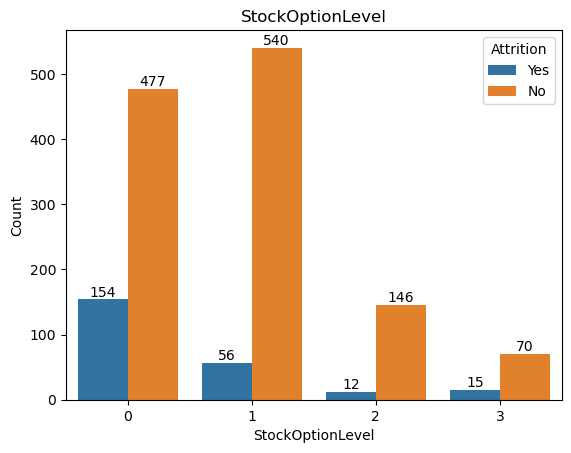

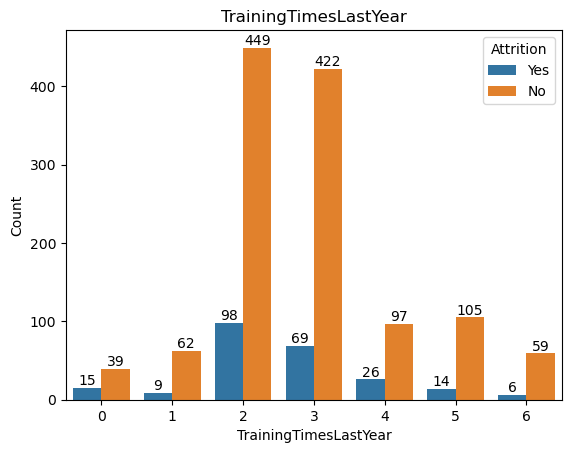

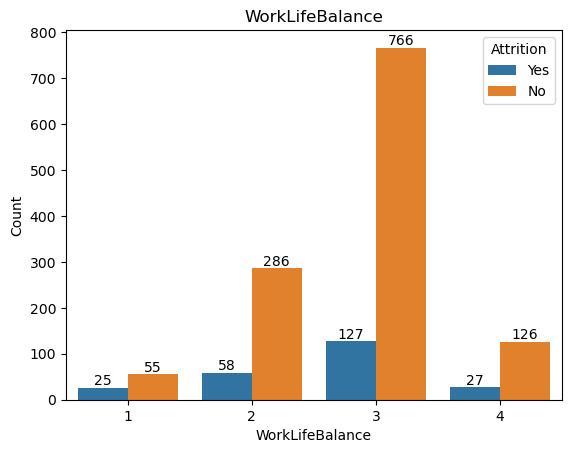

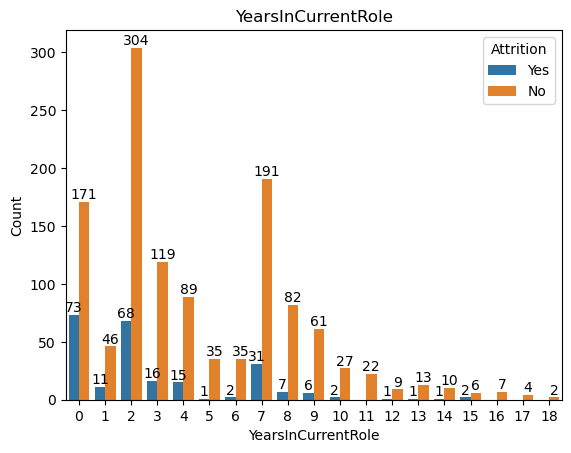

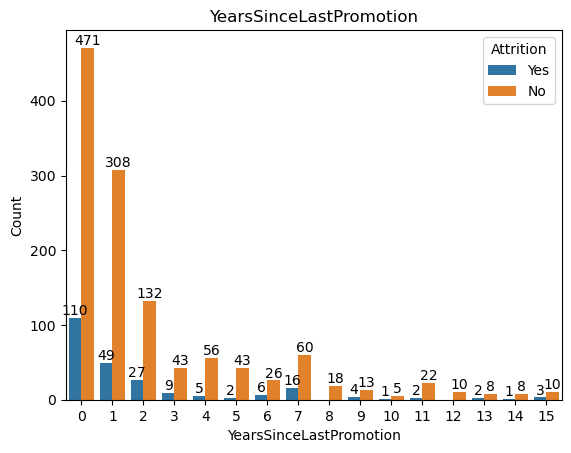

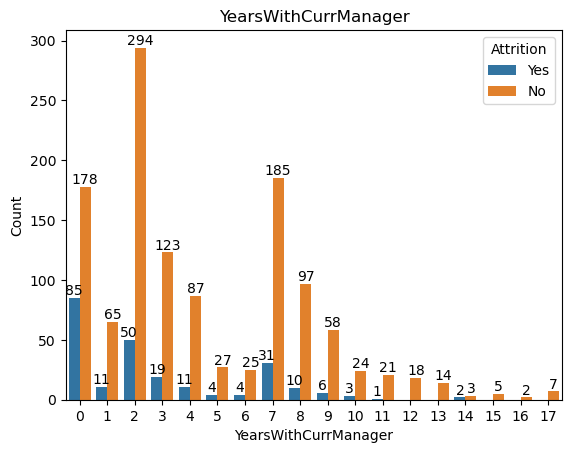

In [19]:
for i in numeric_cols:
    if (df[i].nunique()<=20):
        plt.figure()
        ax=sns.countplot(data=df,x=i,hue='Attrition')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()

##### Crrelation analysis

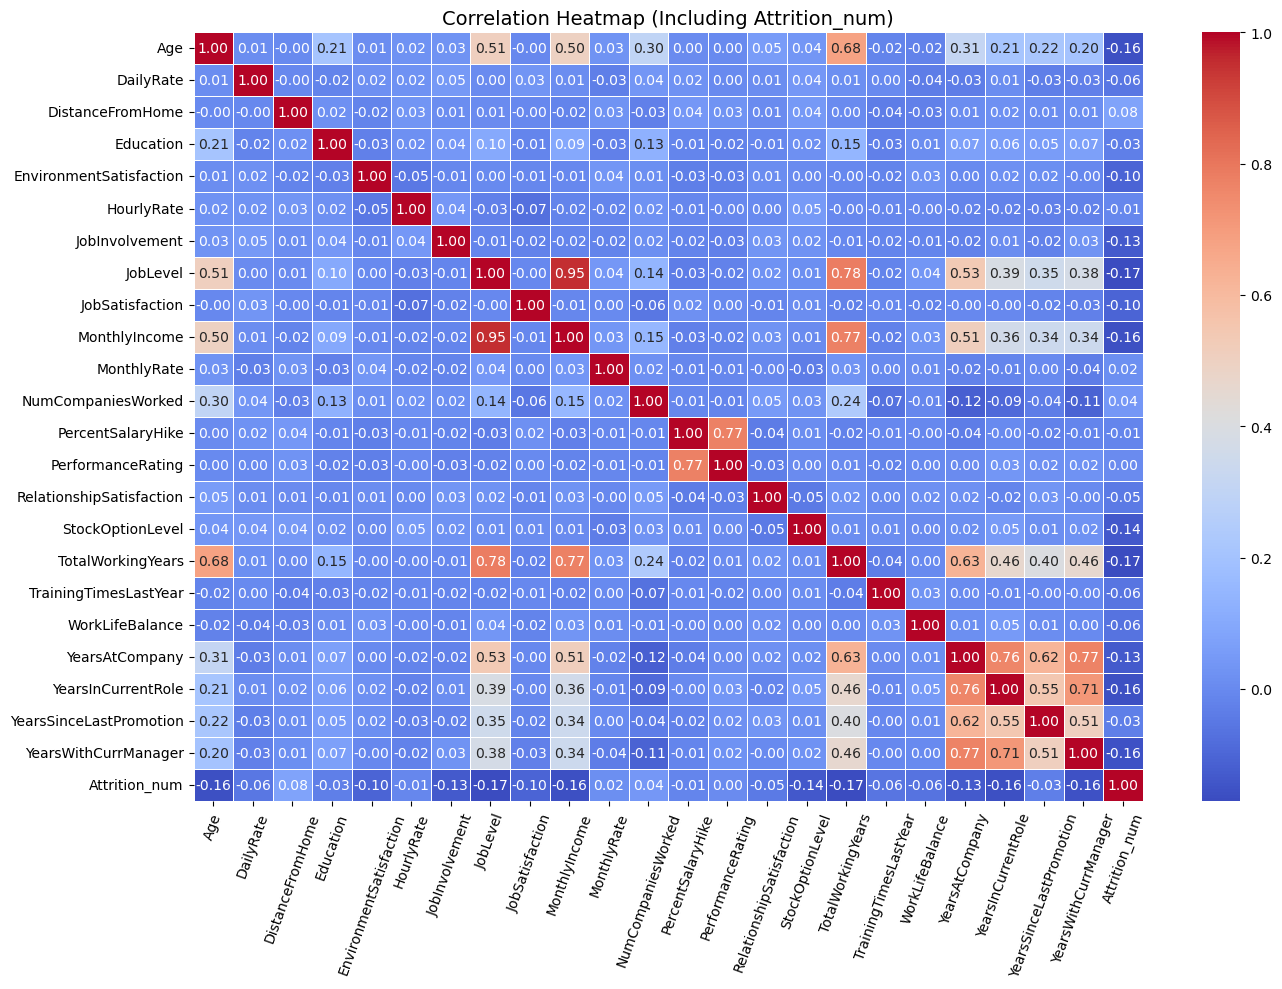

In [21]:
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})

numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Including Attrition_num)", fontsize=14)
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=df.select_dtypes(include='object').columns
le = LabelEncoder()

In [24]:
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])

In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,1,2,1102,2,1,2,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,0,1,279,1,8,1,1,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,0,2,591,1,2,1,3,1,1,...,4,1,6,3,3,2,2,2,2,0


##### target variable Value count

In [27]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

##### machine learning model

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

###### Split the data into independence and dependece varibles

In [31]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

###### Imbalance data convert into balance used SMORT Analysis

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Check for numeric columns only before applying SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully!")
print("New class distribution:", pd.Series(y_train_smote).value_counts())

SMOTE applied successfully!
New class distribution: Attrition
0    987
1    987
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.4, random_state=42)

##### Random Forest Model traning

In [37]:
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### model evalution

In [39]:
y_pred = rf_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       406

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790



##### LogisticRegression

In [41]:
lg_model_oversampled = LogisticRegression()

# Fit the model to the training data
lg_model_oversampled.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = lg_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       384
           1       0.69      0.77      0.73       406

    accuracy                           0.71       790
   macro avg       0.71      0.71      0.71       790
weighted avg       0.71      0.71      0.71       790



##### Knn classifier

In [44]:
kn_model_oversampled = KNeighborsClassifier()

# Fit the model to the training data
kn_model_oversampled.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = kn_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       384
           1       0.71      0.84      0.77       406

    accuracy                           0.75       790
   macro avg       0.75      0.74      0.74       790
weighted avg       0.75      0.75      0.74       790



##### Feature Importances

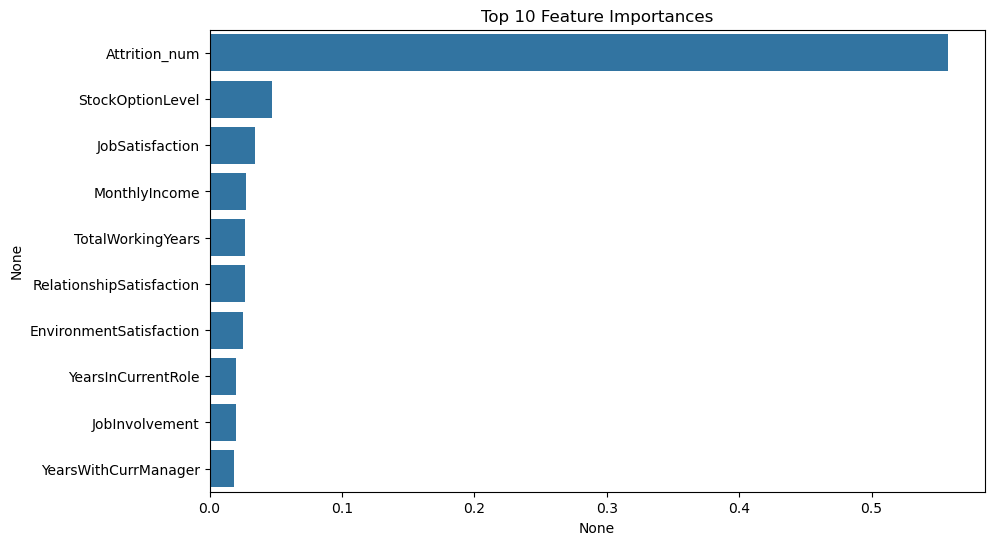

In [47]:
importances = rf_model_oversampled.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances')
plt.show()
